In [ ]:
import pandas as pd  
import numpy as np
from google.colab import files
upload = files.upload()

Saving Realestate.csv to Realestate.csv


In [ ]:
realestate = pd.read_csv('Realestate.csv')
realestate

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
realestate.shape

(414, 8)

In [ ]:
realestate['logprice']=np.log(realestate['Y house price of unit area'])
realestate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,logprice
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,3.634951
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,3.742420
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,3.856510
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,4.003690
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,3.763523


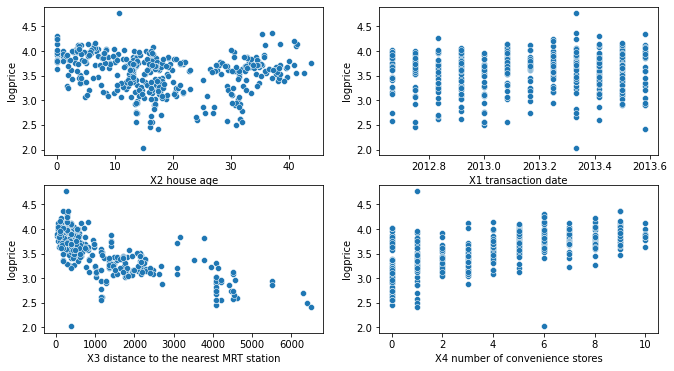

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(2,2, figsize=(11,6))
plt1 = sns.scatterplot(data = realestate, x = 'X2 house age', y = 'logprice', ax = axs[0,0])
plt2 = sns.scatterplot(data = realestate, x = 'X1 transaction date', y = 'logprice', ax = axs[0,1])
plt3 = sns.scatterplot(data = realestate, x = 'X3 distance to the nearest MRT station', y = 'logprice', ax = axs[1,0])
plt4 = sns.scatterplot(data = realestate, x = 'X4 number of convenience stores', y = 'logprice', ax = axs[1,1])


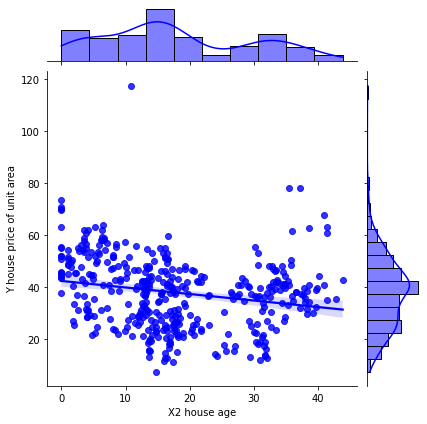

In [ ]:
plt.hexbin = sns.jointplot(x='X2 house age', y='Y house price of unit area', data= realestate, kind= "reg", color = 'blue')


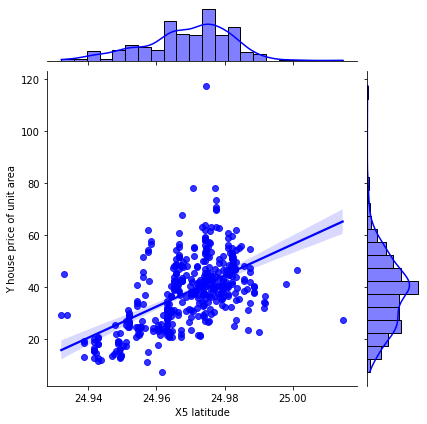

In [ ]:
plt.hexbin = sns.jointplot(x='X5 latitude', y='Y house price of unit area', data= realestate, kind= "reg", color = 'blue')

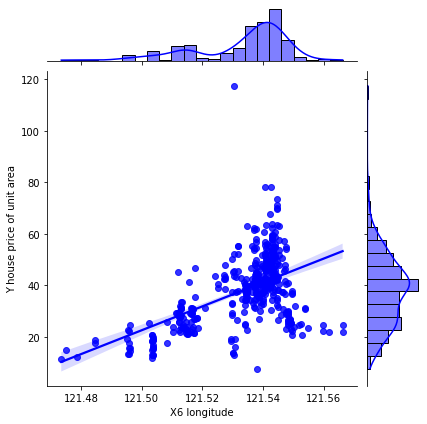

In [ ]:
plt.hexbin = sns.jointplot(x='X6 longitude', y='Y house price of unit area', data= realestate, kind= "reg", color = 'blue')

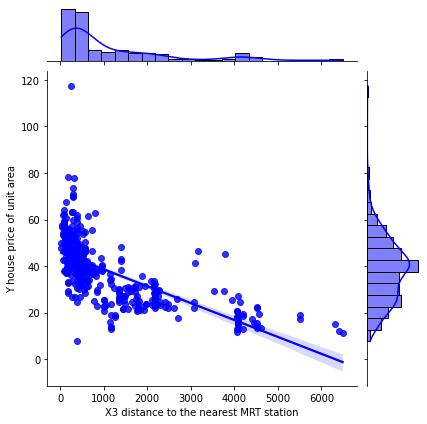

In [ ]:
plt.hexbin = sns.jointplot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', data= realestate, kind= "reg", color = 'blue')


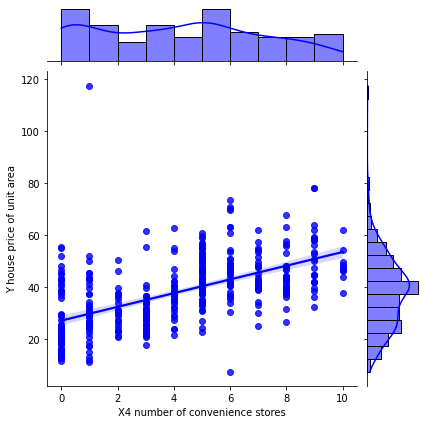

In [ ]:
plt.hexbin = sns.jointplot(x='X4 number of convenience stores', y='Y house price of unit area', data= realestate, kind= "reg", color = 'blue')


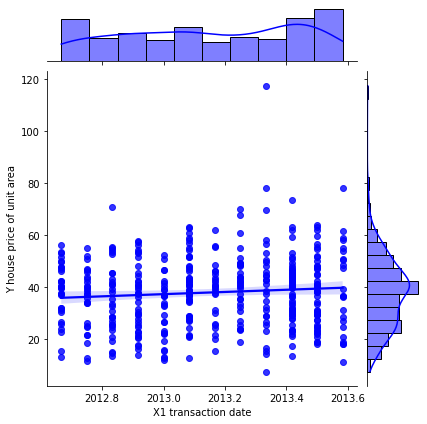

In [ ]:
plt.hexbin = sns.jointplot(x='X1 transaction date', y='Y house price of unit area', data= realestate, kind= "reg", color = 'blue')


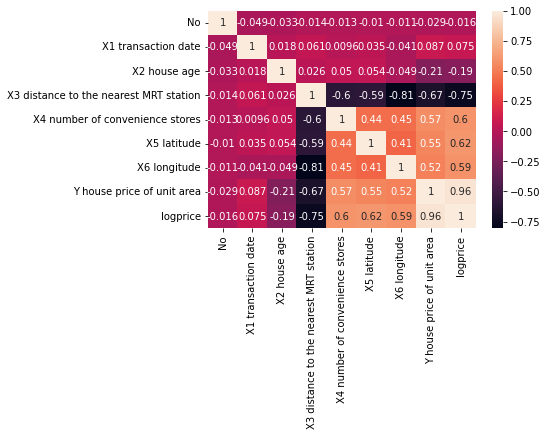

In [ ]:
# check the correlation among all variables

sns.heatmap(realestate.corr(),annot=True)

In [ ]:
#Ssingle variable linear regression

X = realestate['X2 house age']
#dependent variable to y
y = realestate['Y house price of unit area']

In [ ]:
X

0      32.0
1      19.5
2      13.3
3      13.3
4       5.0
       ... 
409    13.7
410     5.6
411    18.8
412     8.1
413     6.5
Name: X2 house age, Length: 414, dtype: float64

In [ ]:
import statsmodels.api as sm
#method sm.add_contant() to add a constant
X = sm.add_constant(X)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,X2 house age
0,1.0,32.0
1,1.0,19.5
2,1.0,13.3
3,1.0,13.3
4,1.0,5.0
...,...,...
409,1.0,13.7
410,1.0,5.6
411,1.0,18.8
412,1.0,8.1


In [ ]:
#create a fitted model 
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.044
Model:                                    OLS   Adj. R-squared:                  0.042
Method:                         Least Squares   F-statistic:                     19.11
Date:                        Sat, 18 Jun 2022   Prob (F-statistic):           1.56e-05
Time:                                16:00:40   Log-Likelihood:                -1658.3
No. Observations:                         414   AIC:                             3321.
Df Residuals:                             412   BIC:                             3329.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [ ]:
#model 2
X= realestate[['X2 house age','X3 distance to the nearest MRT station']]
y=realestate['Y house price of unit area']

X = sm.add_constant(X)
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.491
Model:                                    OLS   Adj. R-squared:                  0.489
Method:                         Least Squares   F-statistic:                     198.3
Date:                        Sat, 18 Jun 2022   Prob (F-statistic):           5.07e-61
Time:                                16:01:04   Log-Likelihood:                -1527.9
No. Observations:                         414   AIC:                             3062.
Df Residuals:                             411   BIC:                             3074.
Df Model:                                   2                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#model3
 X = realestate[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']]
y = realestate['Y house price of unit area']

X = sm.add_constant(X)
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.541
Model:                                    OLS   Adj. R-squared:                  0.538
Method:                         Least Squares   F-statistic:                     161.1
Date:                        Sat, 18 Jun 2022   Prob (F-statistic):           5.44e-69
Time:                                16:04:48   Log-Likelihood:                -1506.5
No. Observations:                         414   AIC:                             3021.
Df Residuals:                             410   BIC:                             3037.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
from google.colab import files
upload = files.upload()

Saving wine_test.csv to wine_test.csv


In [ ]:
#model3FINAL
X = realestate[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X1 transaction date','X5 latitude','X6 longitude' ]]
y = realestate['Y house price of unit area']

X = sm.add_constant(X)
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.582
Model:                                    OLS   Adj. R-squared:                  0.576
Method:                         Least Squares   F-statistic:                     94.59
Date:                        Sat, 18 Jun 2022   Prob (F-statistic):           4.86e-74
Time:                                17:55:19   Log-Likelihood:                -1487.0
No. Observations:                         414   AIC:                             2988.
Df Residuals:                             407   BIC:                             3016.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
realestatetest = pd.read_csv('Realestate.csv')
realestatetest

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
